## In this notebook we show how to apply the PFT code

In [1]:
%load_ext autoreload
%autoreload 2

from PacketFeatureTree import *
from APREdatabase import load_protocols, load_formats, get_capture_csvs, parse_df_to_X_y
rtr = '../../'


In [2]:
ProtocolsDict = load_protocols(rel_to_root=rtr)
Protocol = "ModBus"

In [3]:
ModBusFormatsDF = load_formats(ProtocolsDict, Protocol, rel_to_root=rtr)
for capture_df in get_capture_csvs(Protocol, rel_to_root=rtr):
    X, _, _, _ = parse_df_to_X_y(capture_df, ModBusFormatsDF)
    break
X[0]

Getting capture csvs for ModBus
../../src/APREdatabase/Protocols/ModBus/ics-github/modbus_ics.csv
../../src/APREdatabase/Protocols/ModBus/netplier/modbus_100.csv


(1223541953.927963, '0300010001')

### Packet Field Tree Generation

id


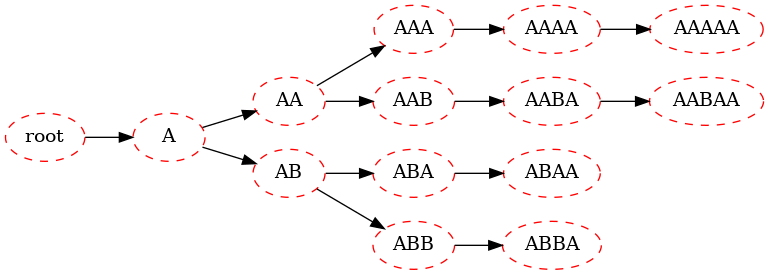

In [4]:
pft1 = OneBytePFT(numeric_thresh=3, depth=10000)
pft1.fit(X[:1000])
pft1.show(attr='id')

type


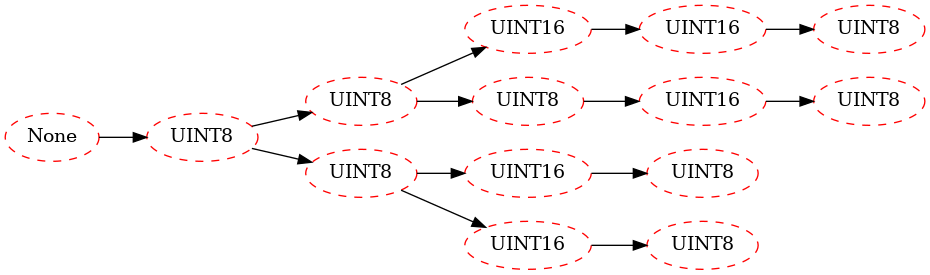

In [5]:
# load the byte-syntax-probability model
model_file = f'ByteLabelModels/clf_{Protocol}.pkl'
pft2 = LabelledPFT(pft1, model_file)
pft2.label_bytes()
pft2.show()

type


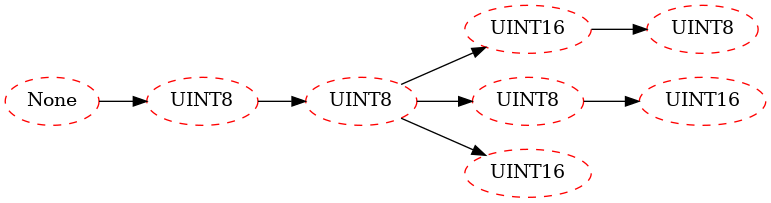

In [6]:
pft2.fit()
pft2.show()